# 01_tensorflow_keras

* Eager Execution

In [ ]:
import tensorflow as tf
#tensorflow import

a = tf.constant(1.0)
#상수 생성
b = tf.constant(2.0)
#상수 생성
c = a + b

c.numpy()
#eager execution

3.0

In [ ]:
W = tf.Variable(tf.random.normal([1]))
#가우시안 분포
print(W.numpy())
#initial W
print('=================')

for step in range(2):
    W = W + 1.0
    #변수 W 초기화 없이 즉시 실행(eager execution)
    print(step, W.numpy())

[-1.0767593]
0 [-0.07675934]
1 [0.92324066]


In [ ]:
a = tf.constant(1.0)
b = tf.constant(3.0)

#함수 정의
def tensor_sum(x,y):
    return x + y

result = tensor_sum(a,b)
print(type(result))
print(result.numpy())
#eager execution

<class 'tensorflow.python.framework.ops.EagerTensor'>
4.0


## Keras as high-level API

['User' -- Keras(High level API) -- Tensorflow(Back-end) -- CPU / GPU / TPU]

## Keras 특징

-User friendliness: 일반신경망(ANN), CNN, RNN 모델 또는 이를 조합한 다양한 딥러닝 모델을 쉽게 구축 가능

-Modularity: 신경망 층, 손실 함수, 활성화 함수, 최적화 알고리즘 등 모두 독립적인 모듈로서 기능, 서로 조합이 가능해 새로운 모델을 보다 빠르게 만들고 학습 가능

train data - 학습에 사용되는 데이터, 가중치와 bias 최적화하기위해 사용됨.

validation data - 1 epoch 마다 overfitting 확인을 위해(during learning)

test data - 학습 후 정확도를 평가하거나 임의 입력에 대한 결과 예측을 위해(after learning)

In [ ]:
#simple Linear Regression exercise

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

2.7.0


In [ ]:
x_data = np.array([1,2,3,4,5,6])
t_data = np.array([3,4,5,6,7,8])
#예제 학습 데이터 생성, 

md = Sequential()
#모델 생성
md.add(Flatten(input_shape = (1,)))
#입력층
md.add(Dense(1, activation = 'linear'))
#출력층

#위 과정 간소화 - md.add(Dense(1, input_shape = (1,), activation = 'linear'))

md.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')
md.summary()
#모델 요약

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = md.fit(x_data, t_data, epochs = 1000)
#학습
md.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))
#예제 테스트 데이터를 통한 예측

## Linear Regression in tensorflow


Regression(회귀) - training data 를 이용하여 데이터의 특성과 상관관계 파악 후, 결과를 바탕으로 미지의 테스트 데이터가 주어졌을 때 연속적인(숫자) 값으로 예측하는 것

In ML, 기울기 = 가중치(W) & y 절편 = bias

손실함수(loss function) : training data 정답과 입력에 대한 계산 값 y 의 차이를 모두 더해 수식으로 나타낸 것

오차 부호에 의해, 전체 합이 작게 출력될 수 있음 --> 제곱합 평균을 사용(MSE)

손실 함수가 최소값을 갖도록 W, bias 를 구하는 것이 regression model 의 최종 목적

gradient descent algorithm - 손실함수가 최소값을 가질 수 있도록 도움[편미분값(기울기), learning rate 활용].

Linear Regression simple exercise)

In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])
#입력 데이터(예제)

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

#정답 데이터(예제)
#2a-3b+2c = y 함수 형태를 띄고 있다,

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)
#data shape 확인

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [ ]:
#구축

md = Sequential()
#모델 생성
md.add(Dense(1, input_shape = (3,), activation = 'linear'))
#input_shape = 입력 데이터 갯수
#activation = 활성화 함수

In [ ]:
#컴파일

md.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


학습이 필요한 parameter = 총 4개(입력값에 대한 W 총 세개, bias 하나)

In [ ]:
#구축한 모델 학습

hist = md.fit(x_data, t_data, epochs = 1000)

In [ ]:
#모델 평가 및 예측

test_data = [[5,5,0], [2,3,1], [-1,0,-1], [10, 5, 2], [4, -1, -2]]
#테스트 데이터

yt = [2*d[0] -3*d[1] + 2*d[2] for d in test_data]
#실제값

pred = md.predict(np.array(test_data))
#예측값

print(pred)
print('========')
print(yt)

[[-5.0001817]
 [-2.9999492]
 [-3.9995534]
 [ 8.999483 ]
 [ 7.000274 ]]
[-5, -3, -4, 9, 7]


In [ ]:
#생성한 모델의 W, b

print(md.input)
#모델 입력
print()
print(md.output)
#모델 출력
print()
print(md.weights)
#모델 가중치

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999473],
       [-3.000055 ],
       [ 1.9999636]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00035729], dtype=float32)>]


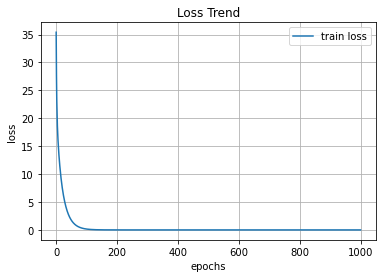

In [ ]:
#손실함수 추세 시각화

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.legend(loc = 'best')

plt.show()

Logistic Regression & Cross Entropy

(train data) -> regression(ax+b = z) -> classification(y = sigmoid(z)) -> prediction y(0 or 1)

선형 회귀 모델링과는 다른 손실 함수가 필요, --> cross-entropy 를 활용해 W, b 조정

우도 함수 - 다수 입력값 X 에 대해 정답 t 가 발생 될 확률을 나타낸 함수

Logistic Regression in ML) 우도 함수값이 최대가 되도록 W 와 b 를 조정해나가는 과정(cross_entropy)

simple exercise)

In [ ]:
#numpy 파일 로드 후 훈련 데이터 생성

try:
    
    data = np.loadtxt('diabetes.csv', delimiter = ',')
    #피마 인디언 부족 당뇨병 질환 여부 데이터
    #데이터 출처 : https://github.com/neowizard2018/neowizard/tree/master/TensorFlow2

    X = data[:, 0:-1]
    y = data[:, [-1]]
    
    print(X.shape)
    print()
    print(y.shape)
    
except Exception as err:
    
    print(str(err))

(759, 8)

(759, 1)


In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

#모델 객체 생성

md = Sequential()
md.add(Dense(y.shape[1], input_shape = (X.shape[1],), activation = 'sigmoid'))

In [ ]:
#컴파일

md.compile(optimizer = SGD(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
md.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습

hist = md.fit(X, y, epochs = 500, validation_split = 0.2, verbose = 2)
#validation_split = 0.2
#train data 의 20% 비율로 검증용 데이터 분할 후 예측 모델의 overfitting 확인

In [ ]:
#모델 정확도 평가

md.evaluate(X,y)
#최종 약 77 % 의 정확도가 확인됐습니다.

24/24 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7721


[0.47896233201026917, 0.7720685005187988]

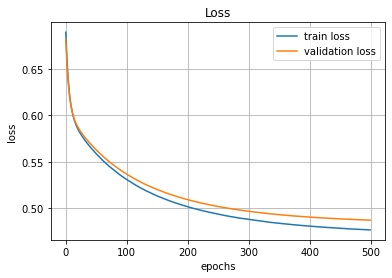

In [ ]:
#시각화

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

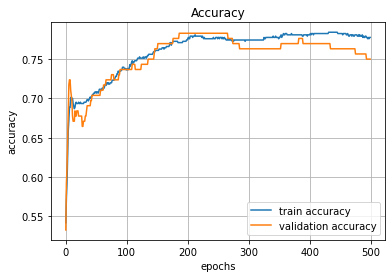

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

epochs = 300 지점부터 train data 에 대한 모델의 overfitting 을 확인할 수 있었습니다.